In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
data = pd.read_csv('imdb.txt')
data.head()

,class,clean_text
0,0,slow moving aimless movie distressed drifting ...
1,0,not sure lost flat characters audience nearly ...
2,0,attempting artiness black white clever camera ...
3,0,little music anything speak
4,1,best scene movie gerardo trying find song keep...


In [2]:
Y = data['class'].values
X = data['clean_text'].values

In [4]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33) # this is random splitting


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_bow = vectorizer.transform(X_train)
X_cv_bow = vectorizer.transform(X_cv)
X_test_bow = vectorizer.transform(X_test)

print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

print("YOU SHOULD NOT DO SOMETHING LIKE THIS")
vectorizer = CountVectorizer()
x_train_bow = vectorizer.fit_transform(X_train)
x_cv_bow = vectorizer.fit_transform(X_cv)
x_test_bow = vectorizer.fit_transform(X_test)

print(x_train_bow.shape, y_train.shape)
print(x_cv_bow.shape, y_cv.shape)
print(x_test_bow.shape, y_test.shape)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")


(334,) (334,)
(165,) (165,)
(247,) (247,)
After vectorizations
(334, 1865) (334,)
(165, 1865) (165,)
(247, 1865) (247,)
YOU SHOULD NOT DO SOMETHING LIKE THIS
(334, 1865) (334,)
(165, 1066) (165,)
(247, 1074) (247,)
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


<pre>
<h2> <font color='red'>YOU SHOULD NOT DO LIKE THIS </font></h2>
1.  <font color='red'>THE VOCABULARY SHOULD BUILT ONLY WITH THE WORDS OF TRAIN DATA</font>
    vectorizer = CountVectorizer()
    x_train_bow = vectorizer.fit_transform(X_train)
    x_cv_bow = vectorizer.fit_transform(X_cv)
    x_test_bow = vectorizer.fit_transform(X_test)
    
2.  <font color='red'>DATA LEAKAGE PROBLEM: IF WE DO LIKE THIS WE ARE LOOKING AT THE TEST DATA BEFORE MODELING</font>
    vectorizer = CountVectorizer()
    X_bow = vectorizer.fit_transfomr(X)
    X_train, X_test, y_train, y_test = train_test_split(X_bow, Y, test_size=0.33)
   
3. <font color='red'>YOU SHOULD PASS THE PROBABILITY SCORES NOT THE PREDICTED VALUES</font>
    y_pred =  neigh.predict(X)
    roc_auc_score(y_ture,y_pred)


</pre>

<h2> <font color='red'>WHAT ARE THESE FUNCTIONS: FIT, TRANSFORM, FIT_TRANSFORM</font></h2>

In [5]:
sentance = ["abc def pqr", "abc pqr cdf jkl cdf"]
example = CountVectorizer()
example.fit(sentance)
# after this statement the example will build the vocabulary with all the unique words
# you should call this function only after fit() 
print(example.vocabulary_) # this will return a dict object, words as key and the occurence as value
print('='*50)

# to convert the sentance into numerical vectors, we will call transform()
# the first feature name will corresponds to first column in transformed matrix
# the 2nd feature name will corresponds to 2nd column in transformed matrix
print(example.get_feature_names())
print(example.transform(sentance).toarray())
# "abc" will corresponds to first colum
# "cdf" will corresponds to 2nd column

{'abc': 0, 'def': 2, 'pqr': 4, 'cdf': 1, 'jkl': 3}
['abc', 'cdf', 'def', 'jkl', 'pqr']
[[1 0 1 0 1]
 [1 2 0 1 1]]


<pre>

When you do
<i><font color='blue'>vec =  CountVectorizer()</font></i>

then it will initiate the <i><font color='blue'>CountVectorizer</font></i> with default parameters.

<i><font color='blue'>vec.fit(Train_text)</font></i>: Means that internally it is only learning the vocabulary of `Text` i.e. unique n-grams

<i><font color='blue'>bag_of_words = vec.transform(Train_text)</font></i>: Means it is applying that learned parameters (vocabulary) to the data and thus giving you output i.e. words in Bag of words formate. 

Now, as you should know that the  <i>vocabulary(unique n-grams)</i> can be different for <i>Train Text</i> and <i>Test Text</i> thus they will give you different dimensional matrices for Train and Test. 

So what you should do is -  <i><font color='blue'>vec = CountVectorizer()</font></i>, <i><font color='blue'>vec.fit(Train_text)</font></i>

which learns the vocabulary of <i>Train Text</i> and then apply or transform your both <i>Train Text</i> and <i>Test Text</i>  using that  
learned vocabulary to ensure the same dimensions for both of them by doing -

<i><font color='blue'>bag_of_words_train = vec.transform(Train_text)</font></i>
and
<i><font color='blue'>bag_of_words_test = vec.transform(Test_text)</font></i>


so to conclude

<i><font color='blue'>
model =  CountVectorizer()
model.fit(train_text)
train_bow = model.transform(train_text)
test_bow = model.transform(test_text) 
</font></i>

or 
   
<i><font color='blue'>
model =  CountVectorizer()
train_bow = model.fit_transform(train_text)
test_bow = model.transform(test_text) 
</font></i>


</pre>

# Applying KNN

# 1: Hyper parameter Tuning (YOU CAN FOLLOW ANY ONE OF THESE)

## 1.1 Method 1: Simple for loop

finding hyper parameter for bow vectorization

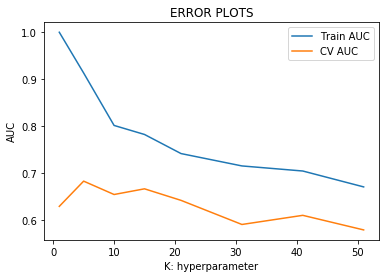

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_bow, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  neigh.predict_proba(X_train_bow)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv_bow)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

## 1.2 Method 2: GridSearch or randomsearch

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[1, 5, 10, 15, 21, 31, 41, 51]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_bow, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

NameError: name 'K' is not defined

In [9]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less
# Note: based on the method you use you might get different hyperparameter values as best one
# so, you choose according to the method you choose, you use gridsearch if you are having more computing power and note it will take more time
# if you increase the cv values in the GridSearchCV you will get more rebust results.

#here we are choosing the best_k based on forloop results
best_k = 10

# 2. Testing with Test data

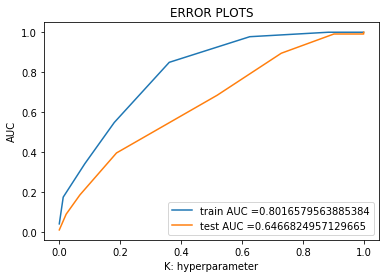

Train confusion matrix
[[127  28]
 [ 81  98]]
Test confusion matrix
[[108  25]
 [ 69  45]]


In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(X_train_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test_bow)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, neigh.predict(X_train_bow)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test_bow)))

<pre>

<h3><font color='blue'>IF Your system is getting stuck when you are working with the Knn: <font color='green'>YOU NEED TO USE BATCH WISE PREDICTION</font></font></h3>

neigh = KNeighborsClassifier(n_neighbors=i)
neigh.fit(X_train_bow, y_train)

# instead of predicting all the data points at a time, we will predict 1000 data points at a time
# you might need to change this code as per requirement
# please try to debug errors on your own, read the errors and try to understand it.
# you should be able to resolve them on your own as you wrote that code :)
# use as many print statements as possible and make sure whats happening in the code
# read the documentation of functions and get the sense out of it

y_train_pred = []
for i in range(0, X_train.shape[0], 1000):
    y_train_pred.extend(neigh.predict_proba(X_train_bow[i,i+1000])[:,1]) # this is a pseudo code

y_cv_pred = []
for i in range(0, X_cv.shape[0], 1000):
    y_cv_pred.extend(neigh.predict_proba(X_cv_bow[i,i+1000])[:,1]) # this is a pseudo code
    

train_auc.append(roc_auc_score(y_train,y_train_pred))
cv_auc.append(roc_auc_score(y_cv, y_cv_pred))


</pre>

# Working with word2vec

## Preparing Reviews for gensim model

In [5]:
i=0
list_of_sentance_train=[]
for sentance in X_train:
    list_of_sentance_train.append(sentance.split())

## Training w2v model

In [6]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [7]:
# this line of code trains your w2v model on the give list of sentances
w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=50, workers=4)

In [22]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[:50])

number of words that occured minimum 5 times  137
sample words  ['bad', 'film', 'ever', 'made', 'budget', 'certainly', 'see', 'anyone', 'no', 'lot', 'real', 'people', 'movie', 'not', 'understand', 'got', 'even', 'good', 'john', 'one', 'screen', 'best', 'look', 'every', 'character', 'script', 'big', 'mess', 'everything', 'could', 'suspense', 'movies', 'plot', 'line', 'away', 'dialogue', 'things', 'make', 'little', 'slow', 'totally', 'get', 'liked', 'predictable', 'watch', 'characters', 'nothing', 'excellent', 'story', 'acting']


# Converting Reviews into Numerical Vectors using W2V vectors

## Algorithm: Avg W2V

In [16]:
from tqdm import tqdm
import numpy as np

### Converting Train data text

In [17]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_train): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
sent_vectors_train = np.array(sent_vectors_train)
print(sent_vectors_train.shape)
print(sent_vectors_train[0])

100%|█████████████████████████████████████████████████████████████████████████████| 334/334 [00:00<00:00, 10694.69it/s]


(334, 50)
[-0.00018406  0.00173803 -0.0008954   0.00504262  0.00167503 -0.00183871
 -0.00188444  0.00033833  0.0031234  -0.00400767 -0.0009279  -0.0052079
  0.00449896  0.00363241  0.00346521  0.00582513 -0.00389868  0.00608431
  0.00534908 -0.00174394  0.00233325  0.0104874  -0.0036213   0.00213231
 -0.00079402  0.00057602  0.0060925   0.00185371 -0.00340013 -0.00087944
 -0.00369444  0.00385778 -0.00297847  0.000734   -0.0007021   0.00035954
 -0.00014872  0.00337882 -0.00020806  0.00130369  0.00024819 -0.00269719
 -0.00666032 -0.00290841 -0.00046812 -0.00347622  0.00315443 -0.00164163
 -0.0027712   0.00085724]


### Converting CV data text

In [25]:
#i=0
list_of_sentance_cv=[]
for sentance in X_cv:
    list_of_sentance_cv.append(sentance.split())

In [26]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_cv): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
sent_vectors_cv = np.array(sent_vectors_cv)
print(sent_vectors_cv.shape)
print(sent_vectors_cv[0])

100%|█████████████████████████████████████████████████████████████████████████████| 165/165 [00:00<00:00, 10573.55it/s]


(165, 50)
[ 0.00778723  0.00989824 -0.00342947  0.00221009  0.00228227 -0.00895271
 -0.00204108  0.0096729   0.00303221  0.00493017  0.00439648 -0.0061363
 -0.00241154  0.00058399 -0.00277983  0.00425395 -0.00183017  0.00639011
 -0.0055906   0.00670496 -0.00221026 -0.00805141 -0.00738096  0.00025064
 -0.00313512  0.00706455  0.00155394  0.01062447 -0.00446205 -0.00557033
  0.00741355 -0.00581987 -0.00231401 -0.00491758 -0.00529418  0.00905058
  0.00871365 -0.00549047 -0.00598536 -0.00051891  0.00141879  0.00458771
 -0.00611693 -0.00749648 -0.002812   -0.00127384  0.00196223 -0.00266312
  0.00579894 -0.00114935]


### Converting Test data text

In [27]:
#i=0
list_of_sentance_test=[]
for sentance in X_test:
    list_of_sentance_test.append(sentance.split())

In [21]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
sent_vectors_test = np.array(sent_vectors_test)
print(sent_vectors_test.shape)
print(sent_vectors_test[0])

100%|██████████████████████████████████████████████████████████████████████████████| 247/247 [00:00<00:00, 7908.77it/s]


(247, 50)
[ 0.00211392 -0.0038255   0.00671547 -0.00163574  0.00231057 -0.00311732
 -0.00337409 -0.00083136  0.00170239 -0.00100594  0.00148549 -0.00373396
  0.00501753 -0.00140833  0.00260006  0.00856394  0.00119408  0.00098493
  0.00257176 -0.00434365 -0.00248982  0.0003326  -0.00430975 -0.00352478
 -0.00091697  0.00268439  0.00680919 -0.00158729 -0.00559707 -0.00358312
  0.0039201   0.00094399  0.00194386 -0.00219571 -0.00186827  0.00113898
 -0.00172071 -0.00192143  0.00219014 -0.00453982  0.00298286 -0.00288799
 -0.00876851 -0.00476267 -0.00186249 -0.00100036  0.00071918 -0.00108546
 -0.00139934  0.00215982]


> <font color='blue'>if you observe the above process, we have trained the W2V model only one time with train data
w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=50, workers=4)</font>

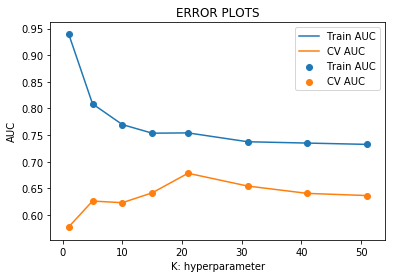

In [22]:
train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(sent_vectors_train, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  neigh.predict_proba(sent_vectors_train)[:,1]
    y_cv_pred =  neigh.predict_proba(sent_vectors_cv)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.scatter(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

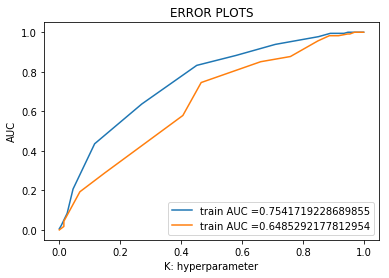

Train confusion matrix
[[ 85  70]
 [ 30 149]]
Test confusion matrix
[[71 62]
 [29 85]]


In [30]:
neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(sent_vectors_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(sent_vectors_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(sent_vectors_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, neigh.predict(sent_vectors_train)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(sent_vectors_test)))